# 빅콘테스트 퓨처스리그 : KBO 정규시즌 팀별 승률, 타율, 방어율 예측

2020.08.21 김채형

# Modeling :: RandomForest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## batter

In [2]:
# 데이터 불러오기
data = pd.read_csv('../../data/batter_feature_selection.csv', index_col=0)
data

,PA,BB_rate,HR_rate,AVG,OBP,SLG,OPS,XR,SB_rate,BABIP,H2_rate,H3_rate
1,12,0.000000,0.000000,0.166667,0.166667,0.166667,0.333333,0.076,0.000000,0.142857,0.000000,0.0
2,10,0.100000,0.000000,0.333333,0.400000,0.444444,0.844444,1.020,0.000000,0.380952,0.333333,0.0
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0
4,1,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.340,0.000000,0.260870,0.000000,0.0
5,36,0.111111,0.166667,0.193548,0.305556,0.322581,0.628136,2.444,0.533333,0.309133,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6930,5,0.000000,0.000000,0.200000,0.200000,0.400000,0.600000,0.344,0.000000,0.290323,1.000000,0.0
6931,67,0.134328,0.400000,0.263158,0.358209,0.596491,0.954700,11.212,0.000000,0.326748,0.066667,0.0
6932,78,0.115385,0.050000,0.294118,0.371795,0.441176,0.812971,11.812,0.745098,0.349434,0.150000,0.1
6933,43,0.023256,0.100000,0.243902,0.279070,0.390244,0.669314,4.056,0.750000,0.302136,0.300000,0.0


In [3]:
batter = data.copy()

In [4]:
# trainset testset split
X = batter[batter.columns.difference(['XR'])]
y = batter['XR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [5]:
# 모델 선언
rfr = RandomForestRegressor()

In [6]:
# 모델 fitting
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# 예측
y_pred = rfr.predict(X_test)

In [8]:
# 성능 평가
print('정확도 : ', rfr.score(X_test, y_test)) 
print('MSE : ', mean_squared_error(y_test, y_pred))

정확도 :  0.9918013600033134
MSE :  0.2943522757993502


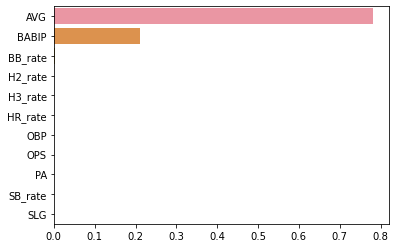

In [9]:
ft_importance = pd.Series(rfr.feature_importances_, index=X_train.columns)
ft_importance = ft_importance.sort_values(ascending=False)

plt.figure()
sns.barplot(x=ft_importance, y=X_train.columns)
plt.show()

## pitcher

In [10]:
data = pd.read_csv('../../data/pitcher_feature_selection.csv', index_col=0)
data

,BF,PA,BK,R,AVG,OBP,SLG,OPS,BABIP,H2_rate,H3_rate,HR_rate
1,195,48,0,8,0.372093,0.437500,0.581395,1.018895,0.405660,0.187500,0.000000,0.125000
2,48,8,0,5,0.500000,0.875000,0.500000,1.375000,0.368421,0.000000,0.000000,0.000000
3,123,35,0,5,0.258065,0.323529,0.483871,0.807400,0.319295,0.125000,0.000000,0.250000
4,181,45,0,5,0.225000,0.311111,0.275000,0.586111,0.273973,0.222222,0.000000,0.000000
5,192,44,0,14,0.428571,0.534884,0.657143,1.192027,0.348045,0.133333,0.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...
5300,152,38,0,8,0.200000,0.368421,0.300000,0.668421,0.333333,0.000000,0.000000,0.166667
5301,293,77,1,6,0.293333,0.311688,0.373333,0.685022,0.279188,0.045455,0.045455,0.045455
5302,24,7,0,3,0.600000,0.714286,0.800000,1.514286,0.352113,0.333333,0.000000,0.000000
5303,70,20,0,7,0.529412,0.550000,0.588235,1.138235,0.471698,0.111111,0.000000,0.000000


In [11]:
pitcher = data.copy()

In [12]:
# trainset testset split
X = pitcher[pitcher.columns.difference(['R'])]
y = pitcher['R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [13]:
# 모델 선언
rfr = RandomForestRegressor()

In [14]:
# 모델 fitting
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# 예측
y_pred = rfr.predict(X_test)

In [16]:
# 성능 평가
print('정확도 : ', rfr.score(X_test, y_test)) 
print('MSE : ', mean_squared_error(y_test, y_pred))

정확도 :  0.8706641847784355
MSE :  4.264006783919598


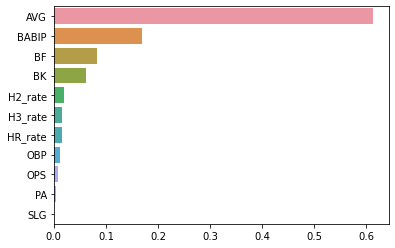

In [17]:
ft_importance = pd.Series(rfr.feature_importances_, index=X_train.columns)
ft_importance = ft_importance.sort_values(ascending=False)

plt.figure()
sns.barplot(x=ft_importance, y=X_train.columns)
plt.show()